## Temporal Alignment

Align the stock data with news articles based on dates to correlate market movements with news sentiment.

#### import data

In [1]:
import pandas as pd

In [2]:
df_stocks = pd.read_csv('data/stocks/df_stocks.csv', sep=",", index_col=0)
df_text = pd.read_csv('data/textual/df_text_sentiment.csv', sep=",", index_col=0)

#### Data preprocessing 

In [3]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_text['date'] = pd.to_datetime(df_text['date'])

In [3]:
df_stocks = df_stocks.sort_values(by='Date', ascending=True)
df_text = df_text.sort_values(by='date', ascending=True)
df_stocks = df_stocks.dropna()

In [5]:
df_stocks.head(2)

,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
4,2010-01-05,AAPL,7.699643,7.616071,7.656429,6.490199,601904800.0,1,0.172893,0.001729
5,2010-01-05,AMZN,6.774000,6.590500,6.734500,6.734500,177038000.0,1,0.589989,0.005900


In [6]:
df_text.head(2)

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label
6769,https://www.cnbc.com/2011/07/21/recession-cnbc...,CNBC Explains,2011-07-21 16:52:36+00:00,Mark Koba,The U.S. economy has suffered through many re...,"Every few years, countries experience an econo...",1028,1,very negative
3098,https://www.cnbc.com/2011/09/01/medicare-and-m...,Medicare and Medicaid,2011-09-01 19:47:59+00:00,Mark Koba,Medicare and Medicaid are often confused with ...,Medicare and Medicaid are often confused with ...,1385,4,positive


In [7]:
df_text.isnull().sum()

url                  0
title                0
date                 0
author             156
description         14
text                 0
Article Length       0
sentiment            0
sentiment_label      0
dtype: int64

Only keep rows that mention microsoft, since it mentioned the most

In [8]:
df_stocks['Stock'].value_counts()

AAPL    3521
AMZN    3521
GOOG    3521
MSFT    3521
TSLA    3399
Name: Stock, dtype: int64

In [9]:
df_stocks = df_stocks[df_stocks['Stock'] == 'MSFT']

#### Determining what timeline to use 

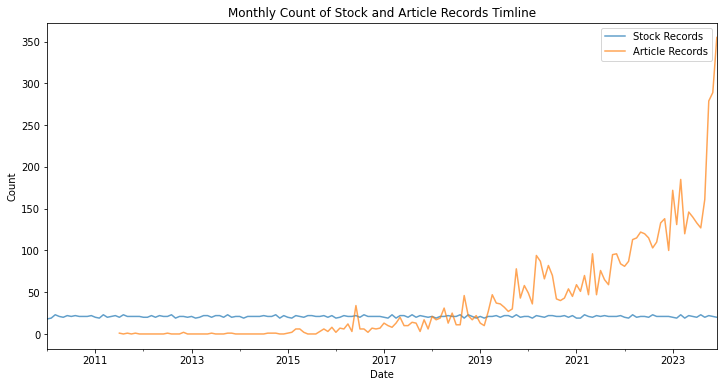

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_stock and df_article are your dataframes for stocks and articles, respectively
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_text['date'] = pd.to_datetime(df_text['date'])

# Resample to monthly frequency and count the number of records
stock_counts = df_stocks.resample('M', on='Date').size()
article_counts = df_text.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
stock_counts.plot(label='Stock Records', alpha=0.7)
article_counts.plot(label='Article Records', alpha=0.7)
plt.title('Monthly Count of Stock and Article Records Timline')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


#### MERGE

In [121]:
# Let's ensure both datasets are aligned in terms of the date format
df_stocks['Date'] = df_stocks['Date'].dt.date
df_text['date'] = df_text['date'].dt.date

# Ensure the date columns in both datasets have the same name
df_stocks.rename(columns={'Date': 'date'}, inplace=True)

# Now you can merge using the 'on' parameter and there won't be duplicate date columns
df = pd.merge(df_text, df_stocks, on='date', how='outer')
df = df.sort_values(by='date', ascending=True)
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180 entries, 0 to 8179
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    6105 non-null   object        
 1   title                  6105 non-null   object        
 2   date                   8180 non-null   datetime64[ns]
 3   author                 5949 non-null   object        
 4   description            6091 non-null   object        
 5   text                   6105 non-null   object        
 6   Article Length         6105 non-null   float64       
 7   sentiment              6105 non-null   float64       
 8   sentiment_label        6105 non-null   object        
 9   Stock                  7478 non-null   object        
 10  Open                   7478 non-null   float64       
 11  Low                    7478 non-null   float64       
 12  Close                  7478 non-null   float64       
 13  Adj

#### date range selection

In [123]:
# Assuming 'df' is your merged DataFrame and you have already formatted the 'date' column as a date
df['date'] = pd.to_datetime(df['date'])

# Define your start date
start_date = pd.to_datetime('2015-01-01')

# Filter the DataFrame
df = df[df['date'] >= start_date]

In [124]:
df.head(1)

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
1257,NaN,NaN,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,MSFT,47.419998,46.540001,46.759998,40.452728,27913900.0,1.0,0.667379,0.006673


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6923 entries, 1257 to 8179
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    6093 non-null   object        
 1   title                  6093 non-null   object        
 2   date                   6923 non-null   datetime64[ns]
 3   author                 5939 non-null   object        
 4   description            6079 non-null   object        
 5   text                   6093 non-null   object        
 6   Article Length         6093 non-null   float64       
 7   sentiment              6093 non-null   float64       
 8   sentiment_label        6093 non-null   object        
 9   Stock                  6221 non-null   object        
 10  Open                   6221 non-null   float64       
 11  Low                    6221 non-null   float64       
 12  Close                  6221 non-null   float64       
 13  Adjus

### EDA

#### looking at distribution to decide between mean/medium 

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

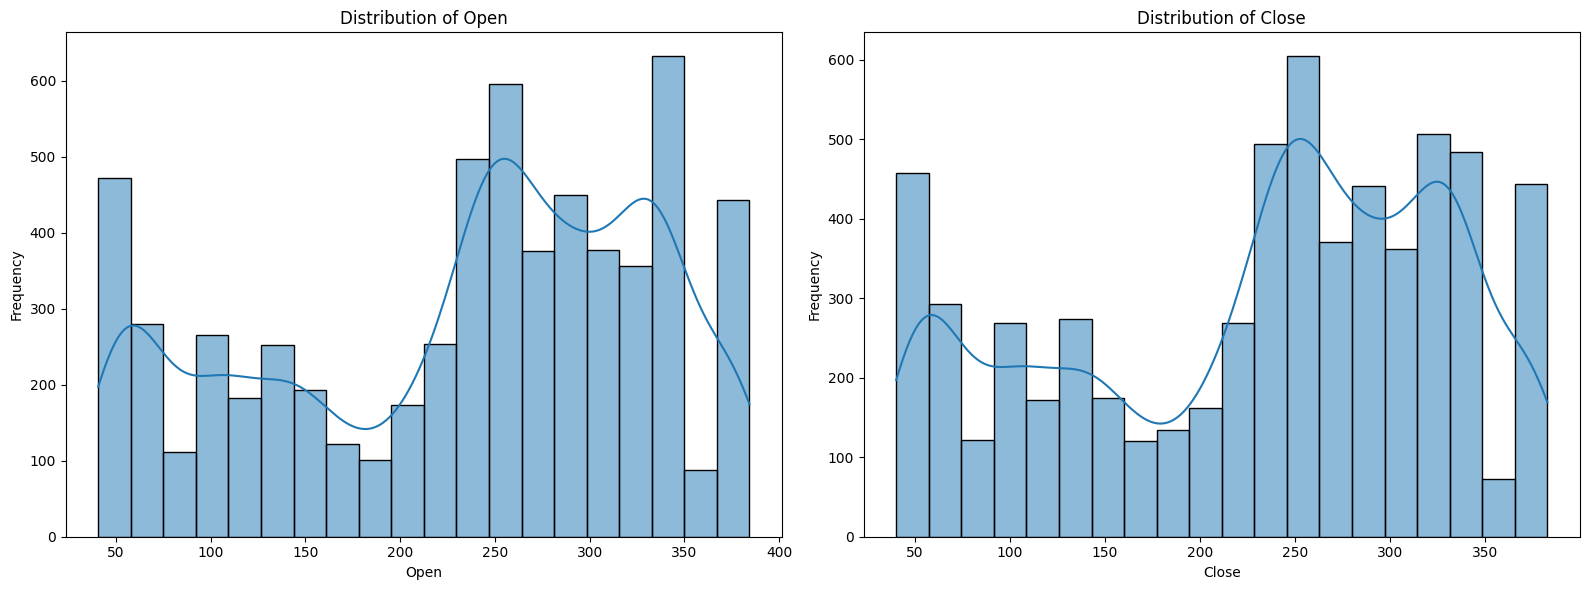

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_num contains multiple columns you want to plot
columns_to_plot = ['Open', 'Close']  # Replace these with your actual column names

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))  # Adjust the figsize as needed

for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [127]:
df.head(2)

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
1257,NaN,NaN,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,MSFT,47.419998,46.540001,46.759998,40.452728,27913900.0,1.0,0.667379,0.006673
1258,NaN,NaN,2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,MSFT,46.730000,46.250000,46.330002,40.080738,39673900.0,1.0,-0.919582,-0.009196


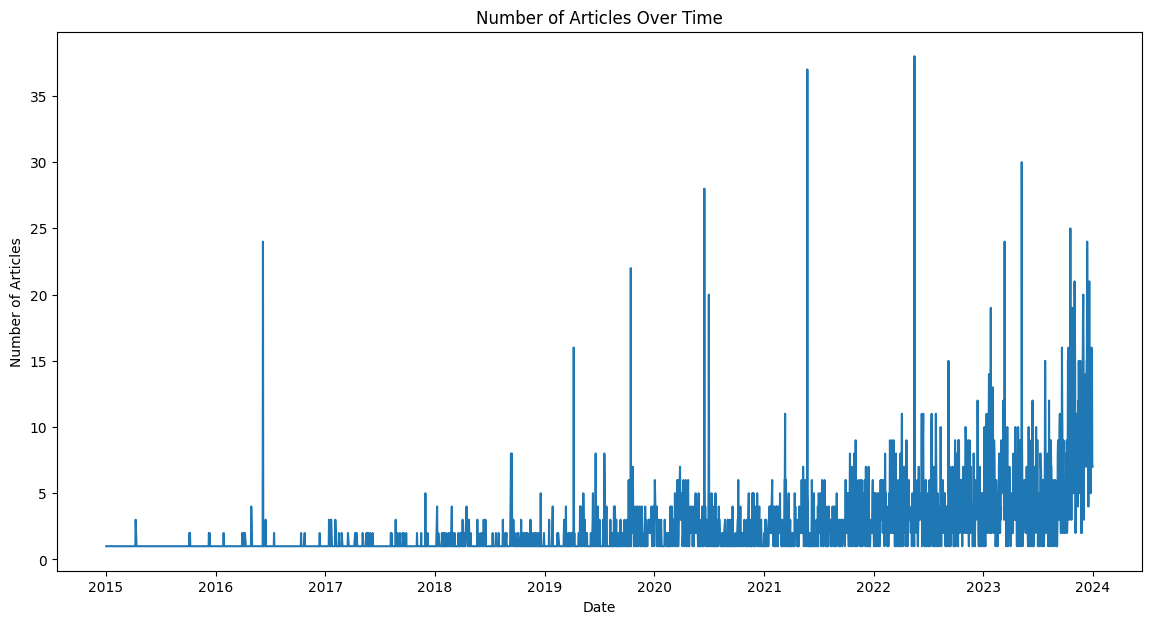

In [128]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

# Now that 'date' is in datetime format, group by date (without time component) and count the articles
articles_over_time_filtered = df.groupby(df['date'].dt.date).size()

# If you're plotting, ensure to include the plotting library and use the correct plotting commands
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
articles_over_time_filtered.plot(kind='line')  # Assuming you want a line plot
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


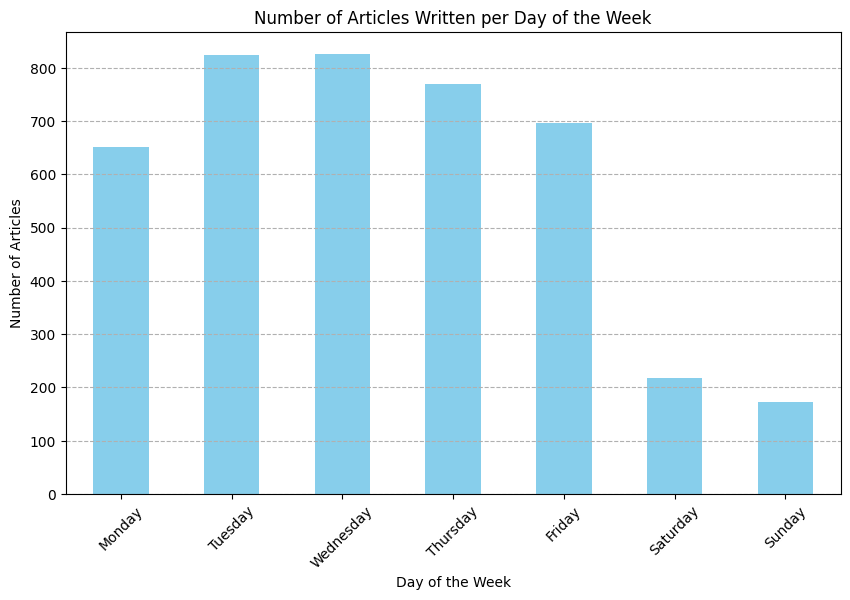

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_text['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_text['day_of_week'] = df_text['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_text['day_name'] = df_text['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_text.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Written per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


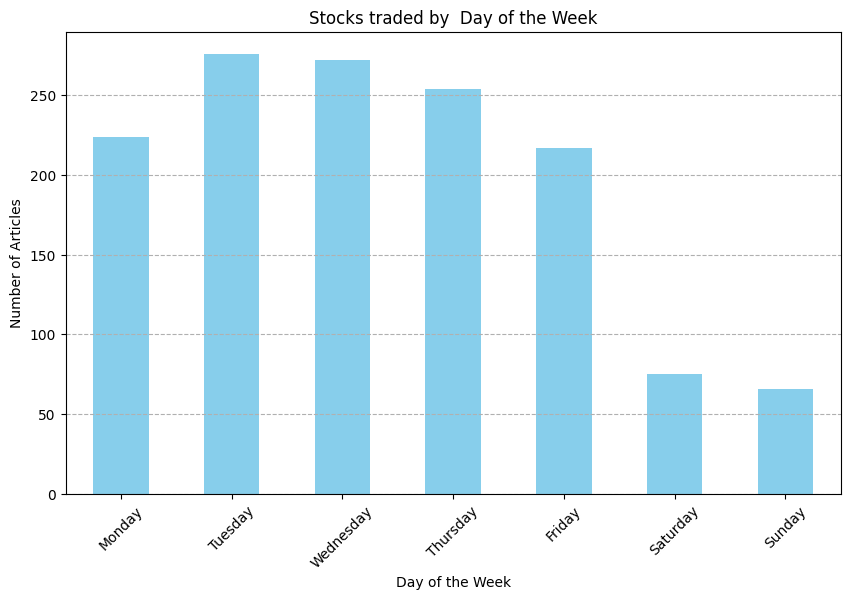

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_stocks['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_stocks['day_name'] = df_stocks['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_stocks.groupby('day_name').size().reindex(day_map.values())

plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Stocks traded by  Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


In [7]:
df_text

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label
6769,https://www.cnbc.com/2011/07/21/recession-cnbc...,CNBC Explains,2011-07-21 16:52:36+00:00,Mark Koba,The U.S. economy has suffered through many re...,"Every few years, countries experience an econo...",1028,1,very negative
3098,https://www.cnbc.com/2011/09/01/medicare-and-m...,Medicare and Medicaid,2011-09-01 19:47:59+00:00,Mark Koba,Medicare and Medicaid are often confused with ...,Medicare and Medicaid are often confused with ...,1385,4,positive
3091,https://www.cnbc.com/2011/11/03/gross-domestic...,Gross Domestic Product,2011-11-04 02:50:00+00:00,Mark Koba,"The gross domestic product or GDP, is arguably...","The gross domestic product or GDP, is arguably...",709,3,neutral
8569,https://www.cnbc.com/2012/07/26/Homes-of-Billi...,Homes of Billionaires,2012-07-26 16:58:20+00:00,Colleen Kane,Berkshire Hathaway’s Omaha world headquarters ...,One of the world’s richest people is known for...,1057,1,very negative
7297,https://www.cnbc.com/2012/11/20/autonomy-made-...,Autonomy Made 'Willful Effort to Mislead' HP,2012-11-20 16:08:59+00:00,Javier E. David and Justin Menza | Special to ...,Hewlett-Packard CEO Meg Whitman strongly defen...,Hewlett-Packard EO Meg Whitman strongly defen...,212,1,very negative
...,...,...,...,...,...,...,...,...,...
1452,https://www.cnbc.com/2023/12/31/berkshire-hath...,Berkshire Hathaway didn't beat the market this...,2023-12-31 12:27:18+00:00,Yun Li,Buffett has long said that while Berkshire has...,Shares of Berkshire Hathaway were up about 16%...,488,2,negative
2022,https://www.cnbc.com/2023/12/31/a-few-us-liste...,A few U.S.-listed China stocks doubled in pric...,2023-12-31 12:32:51+00:00,Evelyn Cheng,Goldman Sachs predicts upside of nearly 80% fo...,A few U. S.-listed China stocks doubled in pri...,711,2,negative
1574,https://www.cnbc.com/2023/12/31/here-are-moves...,Here are some moves investors can make when th...,2023-12-31 13:30:22+00:00,Annie Nova,What moves should investors make when the mark...,It was a very good year for the stock market. ...,547,4,positive
815,https://www.cnbc.com/2023/12/31/why-own-apple-...,Why own Apple stock when there are no near-ter...,2023-12-31 16:00:01+00:00,Zev Fima,"If Apple's history has taught us anything, it'...",Why own Apple stock when there are no near-ter...,1099,1,very negative


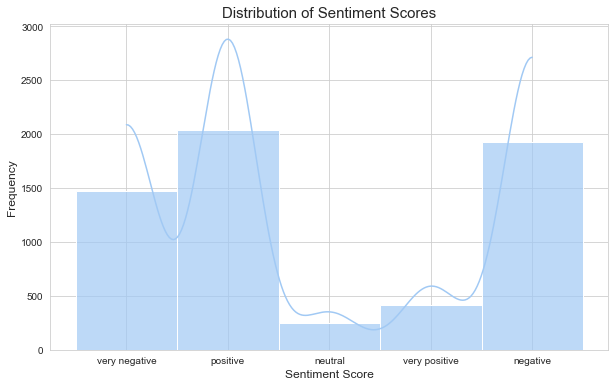

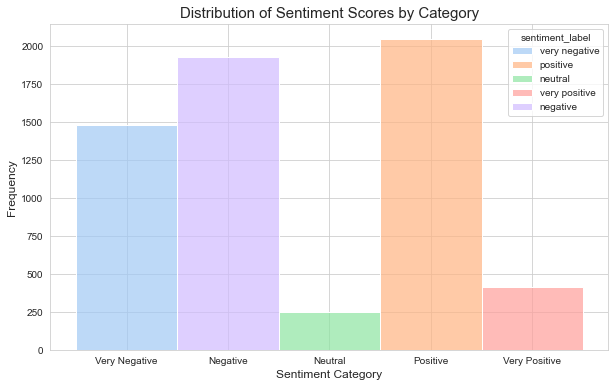

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns  # for improved aesthetics

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a more aesthetically pleasing histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_text["sentiment_label"], bins=10, kde=True, alpha=0.7)

# Enhance the plot with a title and labels
plt.title("Distribution of Sentiment Scores", fontsize=15)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plotimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # for improved aesthetics

# Create a mapping of sentiment categories to a custom order
sentiment_order = {
    "very negative": 1,
    "negative": 2,
    "neutral": 3,
    "positive": 4,
    "very positive": 5,
}

# Assuming 'df_text' has a column "sentiment_label" with text labels for sentiment
# Create a new column with numeric values to define the order
df_text["sentiment_order"] = df_text["sentiment_label"].map(sentiment_order)

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a histogram with the desired order
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_text,
    x="sentiment_order",
    kde=True,
    alpha=0.7,
    bins=5,
    hue="sentiment_label",
    discrete=True,
)

# Set custom tick labels to represent sentiment categories
plt.xticks(
    ticks=[1, 2, 3, 4, 5],
    labels=["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"],
    fontsize=10,
)

# Add title and labels
plt.title("Distribution of Sentiment Scores by Category", fontsize=15)
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()



Weekend activity 

In [131]:
# Alternatively, if you used 'day_name':
weekend_articles_text = df_text[(df_text['day_name'] == 'Saturday') | (df_text['day_name'] == 'Sunday')]

len(weekend_articles_text)


391

In [132]:
# Alternatively, if you used 'day_name':
weekend_articles = df_stocks[(df_stocks['day_name'] == 'Saturday') | (df_stocks['day_name'] == 'Sunday')]

# Display the filtered rows
len(weekend_articles)


141

#### Null Values

In [133]:
## replace null values with Median
import numpy as np

df['Open'] = df['Open'].fillna(df['Open'].median())
df['Close'] = df['Close'].fillna(df['Close'].median())

In [134]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage

    Parameters:
    df (DataFrame): Dataframe to check

    Returns:
    
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
url,830,0.119890
title,830,0.119890
date,0,0.000000
author,984,0.142135
description,844,0.121912
text,830,0.119890
Article Length,830,0.119890
sentiment,830,0.119890
sentiment_label,830,0.119890
Stock,702,0.101401


In [135]:
# Filter the DataFrame to only include rows where any column has a null value
df_with_nulls = df[df.isnull().any(axis=1)]

C:\Users\ethan\AppData\Local\Temp\ipykernel_23532\371439882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nulls['day_of_week'] = df_with_nulls['date'].dt.dayofweek
C:\Users\ethan\AppData\Local\Temp\ipykernel_23532\371439882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nulls['day_name'] = df_with_nulls['day_of_week'].map(day_names)


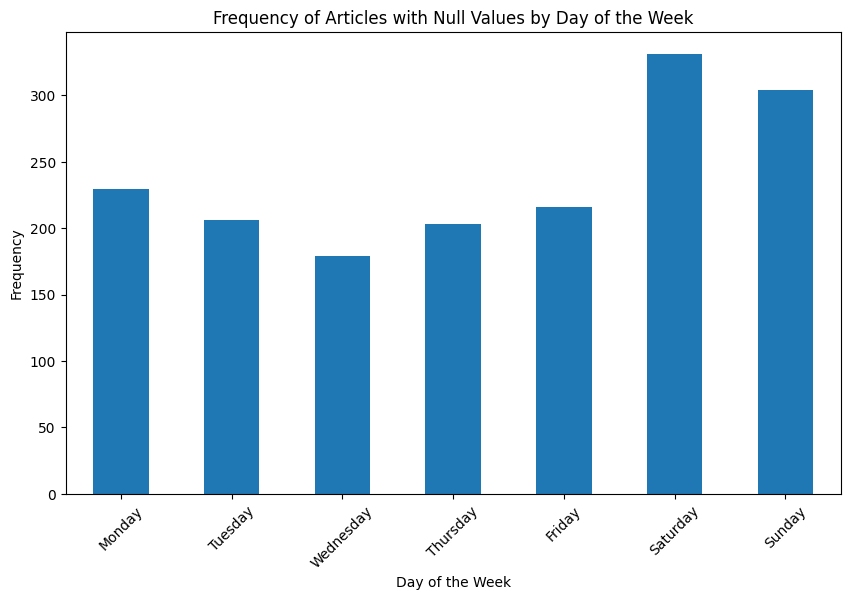

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_with_nulls' is your DataFrame and it already has a 'date' column in datetime format

# Calculate day of the week for each date (Monday=0, Sunday=6)
df_with_nulls['day_of_week'] = df_with_nulls['date'].dt.dayofweek

# Map day of the week to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_with_nulls['day_name'] = df_with_nulls['day_of_week'].map(day_names)

# Count occurrences for each day of the week
day_counts = df_with_nulls['day_name'].value_counts().reindex(day_names.values())

# Plotting
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Frequency of Articles with Null Values by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.show()


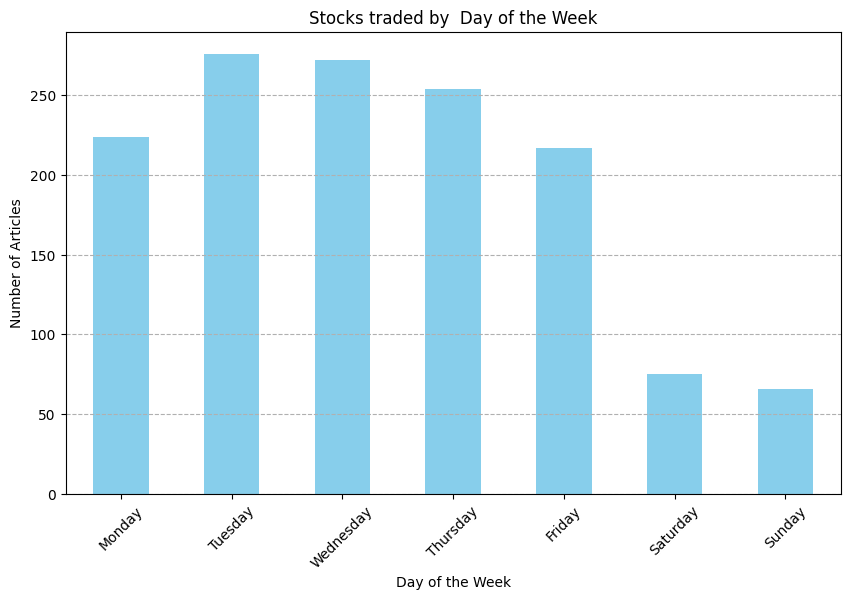

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

df_stocks['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_stocks['day_name'] = df_stocks['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_stocks.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Stocks traded by  Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


C:\Users\ethan\AppData\Local\Temp\ipykernel_23532\1854889488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_days['date'] = pd.to_datetime(stock_days['date'])
C:\Users\ethan\AppData\Local\Temp\ipykernel_23532\1854889488.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_days['date'] = pd.to_datetime(article_days['date'])


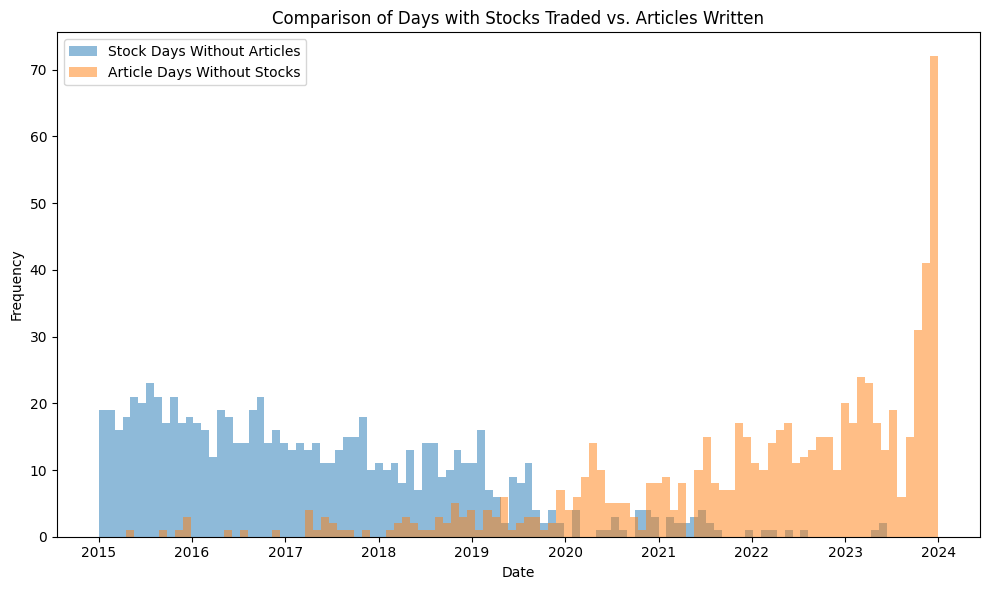

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

stock_days = df[df['Stock'].notna() & df['url'].isna()]

# Filter for days with article data but no stock data (assuming there's a way to identify these)
article_days = df[df['Stock'].isna() & df['url'].notna()]

# Convert date columns to datetime
stock_days['date'] = pd.to_datetime(stock_days['date'])
article_days['date'] = pd.to_datetime(article_days['date'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot histogram for stock days
plt.hist(stock_days['date'], bins=100, alpha=0.5, label='Stock Days Without Articles')

# Plot histogram for article days (Modify this based on actual data scenario)
plt.hist(article_days['date'], bins=100, alpha=0.5, label='Article Days Without Stocks')

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Comparison of Days with Stocks Traded vs. Articles Written')
plt.legend()
plt.tight_layout()
plt.show()


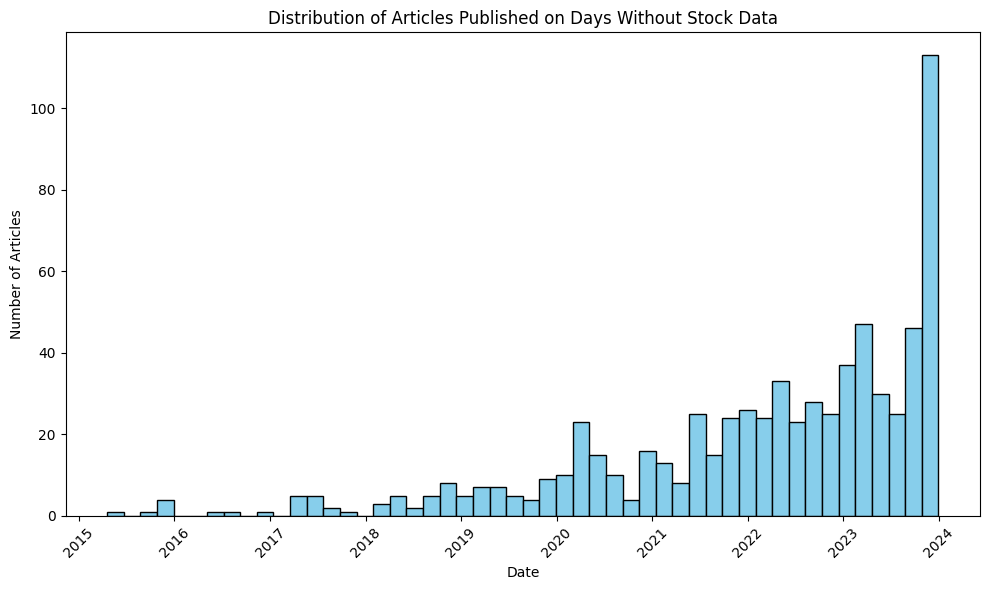

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the merged data
filtered_dataset = df[df['Stock'].isnull()]
dates_with_null_stock = filtered_dataset['date']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(dates_with_null_stock, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Articles Published on Days Without Stock Data')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### remove null values

i removed null values, since there are a very small % of null values in the dataset

In [140]:
df = df.dropna()
df.reset_index(inplace=True, drop=True)

In [141]:
df.isnull().sum()

url                      0
title                    0
date                     0
author                   0
description              0
text                     0
Article Length           0
sentiment                0
sentiment_label          0
Stock                    0
Open                     0
Low                      0
Close                    0
Adjusted_Close           0
Volume                   0
Month                    0
Price_Change_Pct         0
Adjusted_Close_Change    0
dtype: int64

In [142]:
df.head()

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,https://www.cnbc.com/2015/02/24/apples-record-...,Apple’s record rally depends on Obama?,2015-02-24,John Melloy,The size of Apple's capital return program wil...,In order for Apple to extend its 21 percent ra...,499.0,1.0,very negative,MSFT,44.299999,43.919998,44.090000,38.414326,25271700.0,2.0,-0.135903,-0.001359
1,https://www.cnbc.com/2015/02/25/dockers-rise-f...,Docker's rise from sleeper to open source king,2015-02-25,Ari Levy,Docker spent 2014 partnering with the world's ...,"In December 2013, Google announced that its c...",777.0,1.0,very negative,MSFT,44.090000,43.799999,43.990002,38.327202,29759800.0,2.0,-0.226805,-0.002268
2,https://www.cnbc.com/2015/03/02/apple-value-to...,Apple value to hit $1 trillion in 1 year,2015-03-02,John Melloy,Apple will rise to $1 trillion in market value...,Apple will rise to $1 trillion in market value...,592.0,2.0,negative,MSFT,44.189999,43.549999,43.880001,38.231373,31924000.0,3.0,0.068421,0.000684
3,https://www.cnbc.com/2015/03/05/is-apple-world...,"Is Apple, world’s largest stock, ‘underowned’?",2015-03-06,John Melloy,A top Wall Street strategist makes the case th...,"Jason Trennert, a top Wall Street strategist, ...",1112.0,4.0,positive,MSFT,43.110001,42.150002,42.360001,36.907036,36248800.0,3.0,-1.739736,-0.017397
4,https://www.cnbc.com/2015/03/09/apple-may-sell...,Apple may sell 1 billion 'life-saving' watches,2015-03-09,John Melloy,CNBC Pro Preview: Influential technology analy...,The following is a free preview of the content...,506.0,1.0,very negative,MSFT,43.130001,42.189999,42.849998,37.333958,32108000.0,3.0,1.156747,0.011567


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5255 entries, 0 to 5254
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    5255 non-null   object        
 1   title                  5255 non-null   object        
 2   date                   5255 non-null   datetime64[ns]
 3   author                 5255 non-null   object        
 4   description            5255 non-null   object        
 5   text                   5255 non-null   object        
 6   Article Length         5255 non-null   float64       
 7   sentiment              5255 non-null   float64       
 8   sentiment_label        5255 non-null   object        
 9   Stock                  5255 non-null   object        
 10  Open                   5255 non-null   float64       
 11  Low                    5255 non-null   float64       
 12  Close                  5255 non-null   float64       
 13  Adj


Notes after meeting professor:

look at onyl tsla

and look at somehting lie smp500 but iwth 10 stocks

calculate sentiment score per day 

panel data anlaysis (chapter 16)

In [144]:
df.to_csv('data/merged_df.csv')

delete all the days where an aritlces wan't published 

also figure out how to ttake care of thet null values